In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")


    except RuntimeError as e:
        print(e)





1 Physical GPUs, 1 Logical GPUs


In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce 940MX (UUID: GPU-ffb5177f-d8ce-71bb-2ac1-8bdd43322698)


# DATA PREPROCESSING

In [ ]:
url_train = "https://raw.githubusercontent.com/Jaynila077/InC-Mental-Health-Chatbot/master/NLP_model/emot/new%20data/train.txt"
url_test = "https://raw.githubusercontent.com/Jaynila077/InC-Mental-Health-Chatbot/master/NLP_model/emot/new%20data/test.txt"
url_val = "https://raw.githubusercontent.com/Jaynila077/InC-Mental-Health-Chatbot/master/NLP_model/emot/new%20data/val.txt"

In [ ]:
df_train = pd.read_csv(url_train , names=['content', 'sentiment'], sep=';')

In [ ]:
df_train

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df_test = pd.read_csv(url_test , names=['content', 'sentiment'], sep=';')
df_test

,content,sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [ ]:
df_val = pd.read_csv(url_val , names=['content', 'sentiment'], sep=';')
df_val

,content,sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


## Assesment of the data

### Training

In [ ]:
df_train.sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: sentiment, dtype: int64

In [ ]:
df_train.sentiment.value_counts() / df_train.shape[0] *100

joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: sentiment, dtype: float64

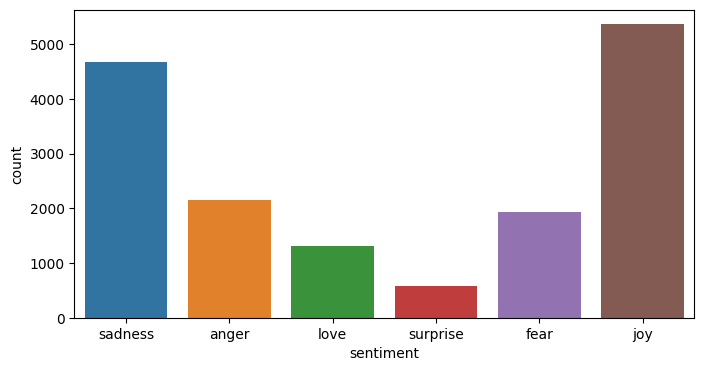

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=df_train);

In [ ]:
df_train.isnull().sum()

content      0
sentiment    0
dtype: int64

In [ ]:
df_train.duplicated().sum()

1

In [ ]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [ ]:
df_train[df_train['content'].duplicated() == True]

,content,sentiment
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [ ]:
index = df_train[df_train['content'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: stop_words, dtype: int64

### Test Set

In [ ]:
df_test.sentiment.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: sentiment, dtype: int64

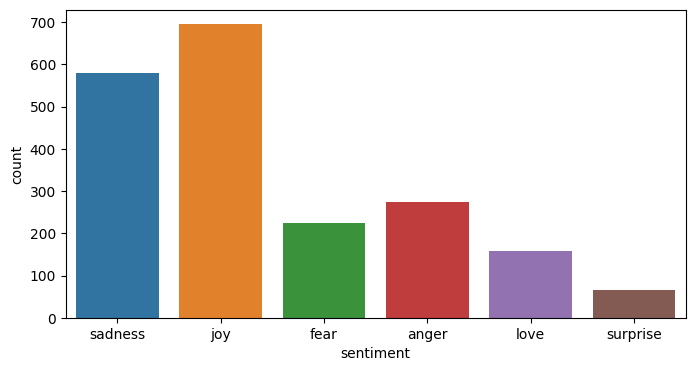

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=df_test);

In [ ]:
df_test.isnull().sum()

content      0
sentiment    0
dtype: int64

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
temp =df_test.copy()
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: stop_words, dtype: int64

### Validation set

In [ ]:
df_val.sentiment.value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: sentiment, dtype: int64

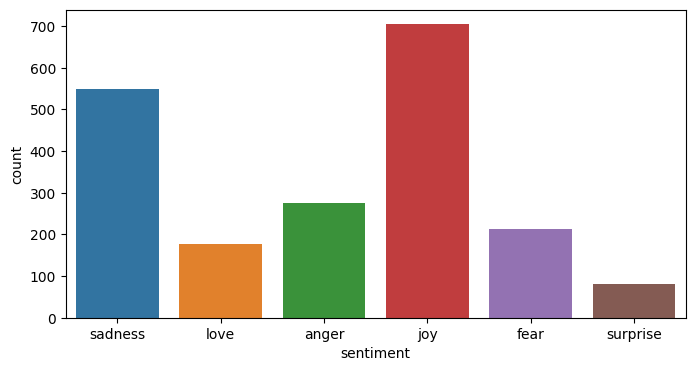

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='sentiment', data=df_val);

In [ ]:
df_val.isnull().sum()

content      0
sentiment    0
dtype: int64

In [ ]:
df_val.duplicated().sum()

0

In [ ]:
temp =df_val.copy()
temp['stop_words'] = temp['sentiment'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

0    2000
Name: stop_words, dtype: int64

In [ ]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""

    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )

    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]

    # Return the filtered DataFrame
    return diff_df

In [ ]:
dataframe_difference(df_train, df_test, which='both')

,content,sentiment,_merge


In [ ]:
dataframe_difference(df_train, df_val, which='both')

,content,sentiment,_merge


In [ ]:
dataframe_difference(df_test, df_val, which='both')

,content,sentiment,_merge


### Cleaning

In [ ]:
nltk.download('wordnet')
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

In [ ]:
def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

In [ ]:
def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

In [ ]:
import re
def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

In [ ]:
def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

In [ ]:
def normalize_text(df):
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : Removing_numbers(text))
    df.content=df.content.apply(lambda text : Removing_punctuations(text))
    df.content=df.content.apply(lambda text : Removing_urls(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    return df

In [ ]:
def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [ ]:
normalized_sentence("my name is  JAY Extremely busy weekend. So much work to do. C")

'name jay extremely busy weekend much work do c'

In [ ]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

In [ ]:
df_train

,content,sentiment
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
15964,brief time beanbag said anna feel like beaten,sadness
15965,turning feel pathetic still waiting table subb...,sadness
15966,feel strong good overall,joy
15967,feel like rude comment im glad,anger


# MODEL

##  RNN LSTM model

### Tokenizing

In [ ]:
X_train = df_train['content']
y_train = df_train['sentiment']

X_test = df_test['content']
y_test = df_test['sentiment']

X_val = df_val['content']
y_val = df_val['sentiment']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)


In [ ]:
y_train

array([4, 4, 0, ..., 2, 0, 4])

In [ ]:
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


In [ ]:
print(y_train)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [ ]:
tokenizer.document_count

17969

In [ ]:
tokenizer.word_index['towards']

220

In [ ]:
tokenizer.texts_to_sequences(X_train[0].split())

[[53], [2], [531]]

In [ ]:
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14325)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
df_test.shape

(2000, 2)

In [ ]:
maxlen = max([len(t) for t in df_train['content']])
maxlen

229

In [ ]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14325


In [ ]:
sequences_train[0]

[53, 2, 531]

In [ ]:
X_train[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional ,Embedding
adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(input_dim=15000, # max_vocb
                             output_dim=200,
                             embeddings_initializer="uniform",
                             input_length=229, #max _len
                             name="embedding_1"))
model.add(Bidirectional(LSTM(64, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(32, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(32, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 229, 200)          3000000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 229, 128)         135680    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 229, 64)          41216     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                      

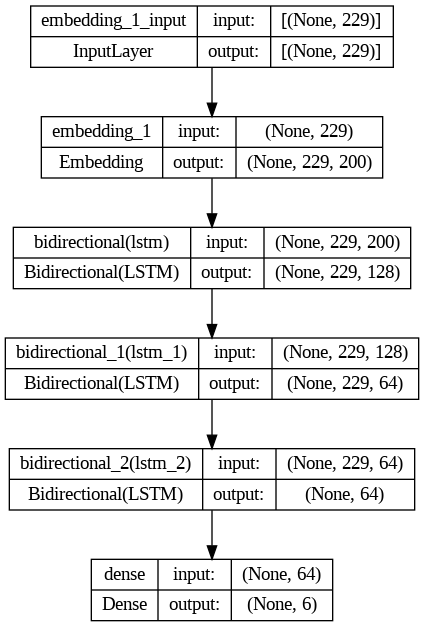

In [ ]:
from tensorflow.keras.utils import plot_model
import pydot
plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=64,
                    epochs=5,
                    callbacks=[callback]
                   )


Epoch 1/5
250/250 [==============================] - 462s 2s/step - loss: 0.6806 - accuracy: 0.7552 - val_loss: 0.2235 - val_accuracy: 0.9175
Epoch 2/5
250/250 [==============================] - 451s 2s/step - loss: 0.1598 - accuracy: 0.9401 - val_loss: 0.1582 - val_accuracy: 0.9250
Epoch 3/5
250/250 [==============================] - 438s 2s/step - loss: 0.0920 - accuracy: 0.9601 - val_loss: 0.1715 - val_accuracy: 0.9235
Epoch 4/5
250/250 [==============================] - 441s 2s/step - loss: 0.0732 - accuracy: 0.9711 - val_loss: 0.1900 - val_accuracy: 0.9255
Epoch 5/5
250/250 [==============================] - 440s 2s/step - loss: 0.0539 - accuracy: 0.9783 - val_loss: 0.2030 - val_accuracy: 0.9265


In [ ]:
model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 11s 179ms/step - loss: 0.2338 - accuracy: 0.9220


[0.23381958901882172, 0.921999990940094]

In [ ]:
from sklearn.metrics import  classification_report
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['sentiment']), y_pred))

63/63 [==============================] - 11s 168ms/step
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       275
           1       0.85      0.94      0.89       224
           2       0.94      0.94      0.94       695
           3       0.82      0.79      0.80       159
           4       0.97      0.97      0.97       581
           5       0.77      0.77      0.77        66

    accuracy                           0.92      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
model.save('Emotion Recognition From Text(V1).h5')


In [ ]:
def emot_recog(sentence):
  print(sentence)
  sentence = normalized_sentence(sentence)
  sentence = tokenizer.texts_to_sequences([sentence])
  sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
  result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
  proba =  np.max(model.predict(sentence))

  return(f"{result} : {proba}\n\n")



In [ ]:
emot_recog('i want to  kill myself')


i want to  kill myself
1/1 [==============================] - 0s 96ms/step


'anger : 0.3035305142402649\n\n'

This model needs to be trained on **more** **data**

---

